# Advanced Customization and Configuration

## Table of Contents

* Introduction
* Customization
  * matplotlib Styles
  * Subplots
    * Making a Plan
    * Revisiting Pandas
    * Individual Plots
    * Combined Plots
* Configuration
  * Run Control

Warm-up proceedures:

In [1]:
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image

Note that we're not using Seaborn for styling like we did previously -- that's beccause the first thing we're going to tackle is creating a custom matplotlib style :-)

## Customization

### Creating a custom style

In the previous notebook, we saw that we could list the available styles with the following call:

In [2]:
print(plt.style.available)

['seaborn-whitegrid', 'seaborn-notebook', 'dark_background', 'fivethirtyeight', 'seaborn-ticks', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-poster', 'seaborn-dark', 'seaborn-paper', 'classic', 'ggplot', 'seaborn-white', 'grayscale', 'seaborn-deep', 'seaborn-bright', 'seaborn-darkgrid', 'seaborn-pastel', 'bmh', 'seaborn-muted', 'seaborn-colorblind']


You can create custom styles and use them by calling ``style.use`` with the path or URL to the style sheet. Alternatively, if you save your ``<style-name>.mplstyle`` file to the ``~/.matplotlib/stylelib`` directory (you may need to create it), you can reuse your custom style sheet with a call to ``style.use(<style-name>)``. Note that a custom style sheet in ``~/.matplotlib/stylelib`` will override a style sheet defined by matplotlib if the styles have the same name.

We've created a style sheet for you to use in this repository for this notebook, but before we go further, let's create a function that will generate a demo plot for us. Then we'll render it, using the default style -- thus having a baseline to compare our work to:

In [3]:
def make_plot ():
    x = np.random.randn(5000, 6)
    (figure, axes) = plt.subplots(figsize=(16,10))
    (n, bins, patches) = axes.hist(x, 12, normed=1, histtype='bar',
                                   label=['Color 1', 'Color 2', 'Color 3',
                                          'Color 4', 'Color 5', 'Color 6'])
    axes.set_title("Histogram\nfor a\nNormal Distribution", fontsize=24)
    axes.set_xlabel("Data Points", fontsize=16)
    axes.set_ylabel("Counts", fontsize=16)
    axes.legend()
    plt.show()

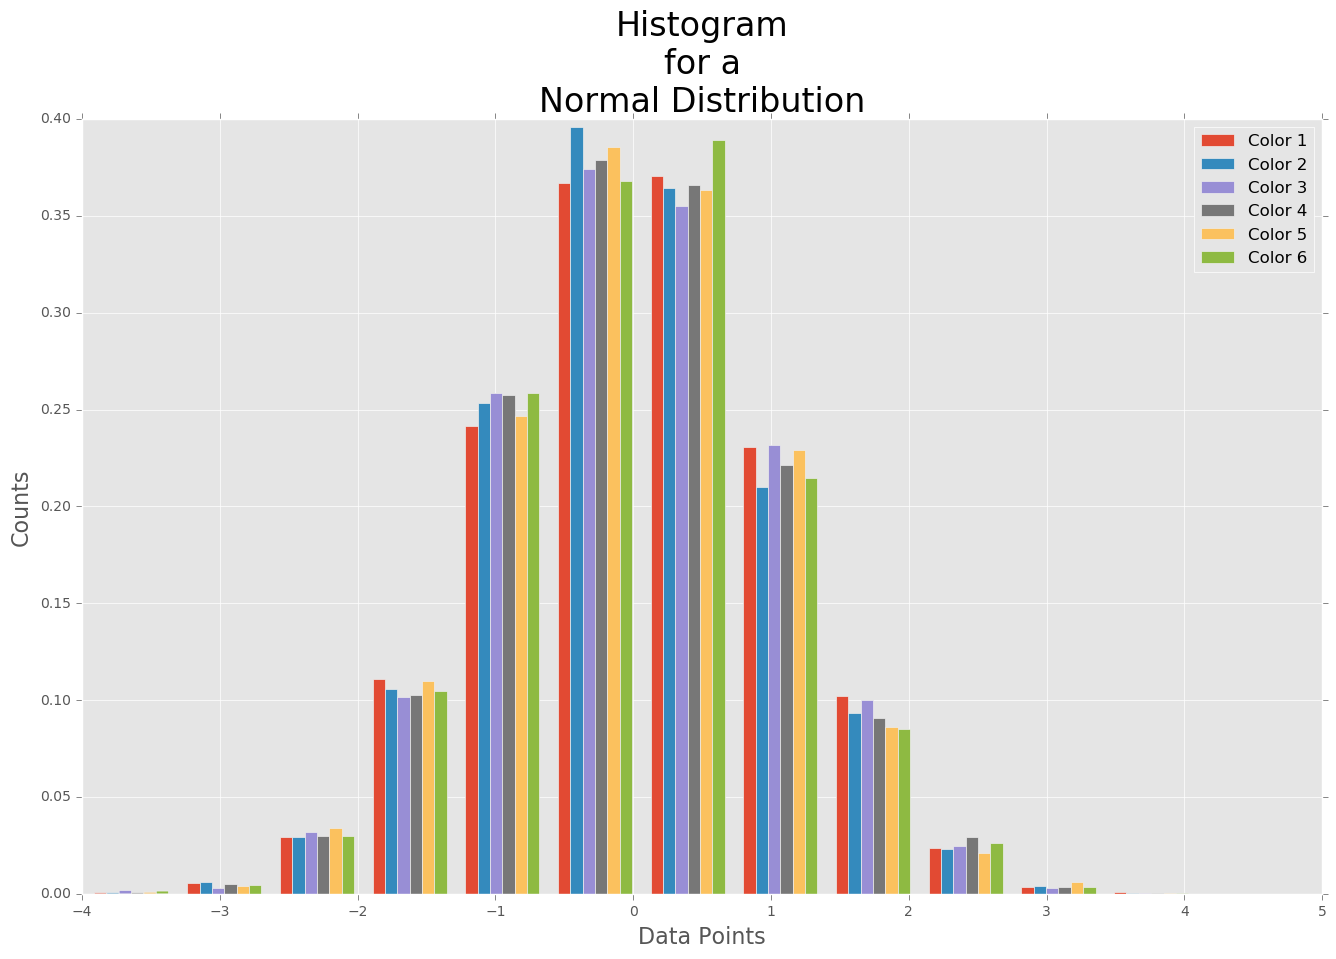

In [4]:
plt.style.use('ggplot')
make_plot()

Okay, we've got our sample plot. Now let's look at the style.

We've created a style called "Superheroine", based on [Thomas Park](http://thomaspark.me/)'s excellent Bootstrap theme, [Superhero](http://bootswatch.com/superhero/). Here's a screenshot of the Boostrap theme:

In [5]:
#Image(filename="superhero.png")

We've saved captured some of the colors from this screenshot and saved them in a couple of plot style files to the "styles" directory in this notebook repo:

In [6]:
ls -l ../styles/

ls: cannot access ../styles/: No such file or directory


Basically, we couldn't make up our mind about whether we liked the light text (style 1) or the orange text (style 2). So we kept both :-)

Let's take a look at the second one's contents which show the hexadecimal colors we copied from the Boostrap theme:

In [7]:
cat ./superheroine-2.mplstyle

lines.color: 4e5d6c
patch.edgecolor: 4e5d6c

text.color: df691b

axes.facecolor: 2b3e50
axes.edgecolor: 4e5d6c
axes.labelcolor: df691b
axes.color_cycle: df691b, 5cb85c, 5bc0de, f0ad4e, d9534f, 4e5d6c
axes.axisbelow: True

xtick.color: 8c949d
ytick.color: 8c949d

grid.color: 4e5d6c

figure.facecolor: 2b3e50
figure.edgecolor: 2b3e50

savefig.facecolor: 2b3e50
savefig.edgecolor: 2b3e50

legend.fancybox: True
legend.shadow: True
legend.frameon: True
legend.framealpha: 0.6

Now let's load it:

In [8]:
plt.style.use("./superheroine-2.mplstyle")

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


And then re-render our plot:

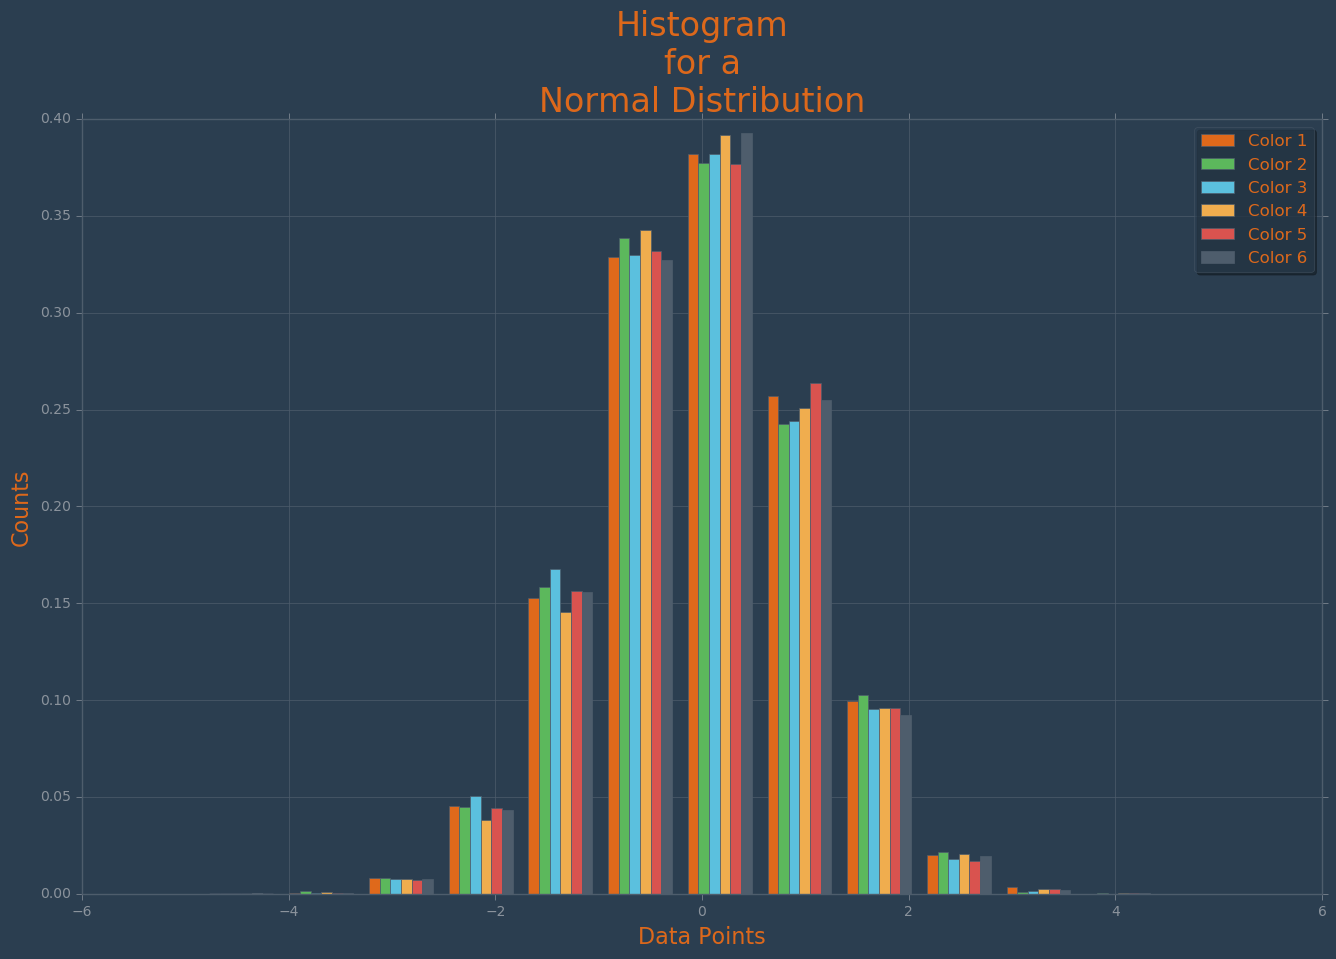

In [9]:
make_plot()

A full list of styles available for customization is in given in the [matplotlib run control file](http://matplotlib.org/users/customizing.html). We'll be discussing this more in the next section.

### Subplots

#### Making a Plan

In this next section, we'll be creating a sophisticated subplot to give you a sense of what's possible with matplotlib's layouts. We'll be ingesting data from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.html), in particular the 1985 [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/Automobile), an example of data which can be used to assess the insurance risks for different vehicles.

We will use it in an effort to compare 21 automobile manufacturers (using 1985 data) along the following dimensions:
* mean price
* mean city MPG
* mean highway MPG
* mean horsepower
* mean curb-weight
* mean relative average loss payment
* mean insurance riskiness

We will limit ourselves to automobile manufacturers that have data for losses as well as 6 or more data rows.

Our subplot will be comprised of the following sections:
 * An overall title 
 * Line plots for max, mean, and min prices
 * Stacked bar chart for combined riskiness/losses
 * Stacked bar chart for riskiness
 * Stacked bar chart for losses
 * Radar charts for each automobile manufacturer
 * Combined scatter plot for city and highway MPG

These will be composed as subplots in the following manner:

```
--------------------------------------------
|               overall title              |
--------------------------------------------
|               price ranges               |
--------------------------------------------
| combined loss/risk |                     |
|                    |        radar        |
----------------------        plots        |
|  risk   |   loss   |                     |
--------------------------------------------
|                   mpg                    |
--------------------------------------------
```

#### Revisiting Pandas

In [10]:
import sys
sys.path.append("../lib")
import demodata, demoplot, radar

raw_data = demodata.get_raw_data()
raw_data.head()

SyntaxError: invalid syntax (demoplot.py, line 5)

In [ ]:
limited_data = demodata.get_limited_data()
limited_data.head()

In [ ]:
demodata.get_all_auto_makes()

In [ ]:
(makes, counts) = demodata.get_make_counts(limited_data)
counts

In [ ]:
(makes, counts) = demodata.get_make_counts(limited_data, lower_bound=6)

In [ ]:
counts

In [ ]:
data = demodata.get_limited_data(lower_bound=6)
data.head()

In [ ]:
len(data.index)

In [ ]:
sum([x[1] for x in counts])

In [ ]:
normed_data = data.copy()
normed_data.rename(columns={"horsepower": "power"}, inplace=True)

Higher values are better for these:

In [ ]:
demodata.norm_columns(["city mpg", "highway mpg", "power"], normed_data)
normed_data.head()

Lower values are better for these:

In [ ]:
demodata.invert_norm_columns(["price", "weight", "riskiness", "losses"], normed_data)
normed_data.head()

#### Individual Plots

In [ ]:
figure = plt.figure(figsize=(15, 5))
prices_gs = mpl.gridspec.GridSpec(1, 1)
prices_axes = demoplot.make_autos_price_plot(figure, prices_gs, data)
plt.show()

In [ ]:
figure = plt.figure(figsize=(15, 5))
mpg_gs = mpl.gridspec.GridSpec(1, 1)
mpg_axes = demoplot.make_autos_mpg_plot(figure, mpg_gs, data)
plt.show()

In [ ]:
figure = plt.figure(figsize=(15, 5))
risk_gs = mpl.gridspec.GridSpec(1, 1)
risk_axes = demoplot.make_autos_riskiness_plot(figure, risk_gs, normed_data)
plt.show()

In [ ]:
figure = plt.figure(figsize=(15, 5))
loss_gs = mpl.gridspec.GridSpec(1, 1)
loss_axes = demoplot.make_autos_losses_plot(figure, loss_gs, normed_data)
plt.show()

In [ ]:
figure = plt.figure(figsize=(15, 5))
risk_loss_gs = mpl.gridspec.GridSpec(1, 1)
risk_loss_axes = demoplot.make_autos_loss_and_risk_plot(figure, risk_loss_gs, normed_data)
plt.show()

In [ ]:
figure = plt.figure(figsize=(15, 5))
radar_gs = mpl.gridspec.GridSpec(3, 7, height_ratios=[1, 10, 10], wspace=0.50, hspace=0.60, top=0.95, bottom=0.25)
radar_axes = demoplot.make_autos_radar_plot(figure, radar_gs, normed_data)
plt.show()

#### Combined Plots

Here's a refresher on the plot layout we're aiming for:

```
--------------------------------------------
|               overall title              |
--------------------------------------------
|               price ranges               |
--------------------------------------------
| combined loss/risk |                     |
|                    |        radar        |
----------------------        plots        |
|  risk   |   loss   |                     |
--------------------------------------------
|                   mpg                    |
--------------------------------------------
```

Let's try that now with just empty graphs, to get a sense of things:

In [ ]:
figure = plt.figure(figsize=(10, 8))
gs_master = mpl.gridspec.GridSpec(4, 2, height_ratios=[1, 2, 8, 2])
# Layer 1 - Title
gs_1 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[0, :])
title_axes = figure.add_subplot(gs_1[0])
# Layer 2 - Price
gs_2 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[1, :])
price_axes = figure.add_subplot(gs_2[0])
# Layer 3 - Risks & Radar
gs_31 = mpl.gridspec.GridSpecFromSubplotSpec(2, 2, height_ratios=[2, 1], subplot_spec=gs_master[2, :1])
risk_and_loss_axes = figure.add_subplot(gs_31[0, :])
risk_axes = figure.add_subplot(gs_31[1, :1])
loss_axes = figure.add_subplot(gs_31[1:, 1])
gs_32 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[2, 1])
radar_axes = figure.add_subplot(gs_32[0])
# Layer 4 - MPG
gs_4 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[3, :])
mpg_axes = figure.add_subplot(gs_4[0])
# Tidy up
gs_master.tight_layout(figure)
plt.show()

In [ ]:
figure = plt.figure(figsize=(15, 15))
gs_master = mpl.gridspec.GridSpec(4, 2, height_ratios=[1, 24, 128, 32], hspace=0, wspace=0)

# Layer 1 - Title
gs_1 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[0, :])
title_axes = figure.add_subplot(gs_1[0])
title_axes.set_title("Demo Plots for 1985 Auto Maker Data", fontsize=30, color="#cdced1")
demoplot.hide_axes(title_axes)

# Layer 2 - Price
gs_2 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[1, :])
price_axes = figure.add_subplot(gs_2[0])
demoplot.make_autos_price_plot(figure, pddata=data, axes=price_axes)

# Layer 3, Part I - Risks
gs_31 = mpl.gridspec.GridSpecFromSubplotSpec(2, 2, height_ratios=[2, 1], hspace=0.4, subplot_spec=gs_master[2, :1])
risk_and_loss_axes = figure.add_subplot(gs_31[0, :])
demoplot.make_autos_loss_and_risk_plot(
    figure, pddata=normed_data, axes=risk_and_loss_axes, x_label=False, rotate_ticks=True)
risk_axes = figure.add_subplot(gs_31[1, :1])
demoplot.make_autos_riskiness_plot(figure, pddata=normed_data, axes=risk_axes, legend=False, labels=False)
loss_axes = figure.add_subplot(gs_31[1:, 1])
demoplot.make_autos_losses_plot(figure, pddata=normed_data, axes=loss_axes, legend=False, labels=False)

# Layer 3, Part II - Radar
gs_32 = mpl.gridspec.GridSpecFromSubplotSpec(
    5, 3, height_ratios=[1, 20, 20, 20, 20], hspace=0.6, wspace=0, subplot_spec=gs_master[2, 1])
(rows, cols) = geometry = gs_32.get_geometry()
title_axes = figure.add_subplot(gs_32[0, :])
inner_axes = []
projection = radar.RadarAxes(spoke_count=len(normed_data.groupby("make").mean().columns))
[inner_axes.append(figure.add_subplot(m, projection=projection)) for m in [n for n in gs_32][cols:]]
demoplot.make_autos_radar_plot(
    figure, pddata=normed_data, title_axes=title_axes, inner_axes=inner_axes, legend_axes=False, 
    geometry=geometry)

# Layer 4 - MPG
gs_4 = mpl.gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs_master[3, :])
mpg_axes = figure.add_subplot(gs_4[0])
demoplot.make_autos_mpg_plot(figure, pddata=data, axes=mpg_axes)

# Tidy up
gs_master.tight_layout(figure)
plt.show()

## Configuration

Get the directory for the matplotlib config files and cache:

In [ ]:
mpl.get_configdir()

In [ ]:
mpl.matplotlib_fname()

matplotlib's ``rcParams`` configuration dictionary holds a great many options for tweaking your use of matplotlib the way you want to:

In [ ]:
len(mpl.rcParams.keys())

The first 10 configuration options in ``rcParams`` are:

In [ ]:
dict(list(mpl.rcParams.items())[:10])

In [ ]:
mpl.rcParams['savefig.jpeg_quality'] = 72
mpl.rcParams['axes.formatter.limits'] = [-5, 5]

In [ ]:
mpl.rcParams['axes.formatter.limits']

In [ ]:
mpl.rcdefaults() 

In [ ]:
mpl.rcParams['axes.formatter.limits']